<a href="https://colab.research.google.com/github/enkiddoo/Digital-Institute/blob/master/Titanic_log_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 14.2 MB/s eta 0:00:00


In [ ]:
# @title imports
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# @title since there were a lot of missing data in Cabin column, i assumed that those passengers did not have particular private cabin, so i filled those with 0 and later i transformed available cabin identifiers to 1 as to "having the specific cabin or not"
train = pd.read_csv("/content/train.csv")
train.head(10)
train["Cabin"].fillna(0,inplace=True)
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


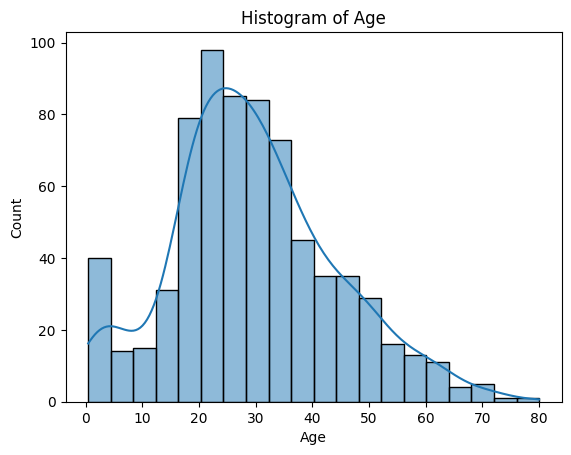

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [ ]:
# @title checked the distribution of age, since it was right skewed i filled nulls with median

sns.histplot(train['Age'], kde=True)
plt.title('Histogram of Age')
plt.show()
train["Age"].median()
train["Age"].fillna(train["Age"].median(),inplace=True)
train.info()
train.head(10)

In [ ]:
# @title sex to 0 & 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# @title Cabin column to 0 & 1
train['Cabin'] = train['Cabin'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
# @title united Sibs and Parch into one column - FamilySize
train['FamilySize'] = train['SibSp'] + train['Parch']

# checking the correlation between features to Survived column, for now i plan to choose Pclass, sex, fare, cabin

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


In [ ]:
train_numerical=train[["PassengerId","Survived","Pclass","Sex","Age","FamilySize","Fare","Cabin"]]

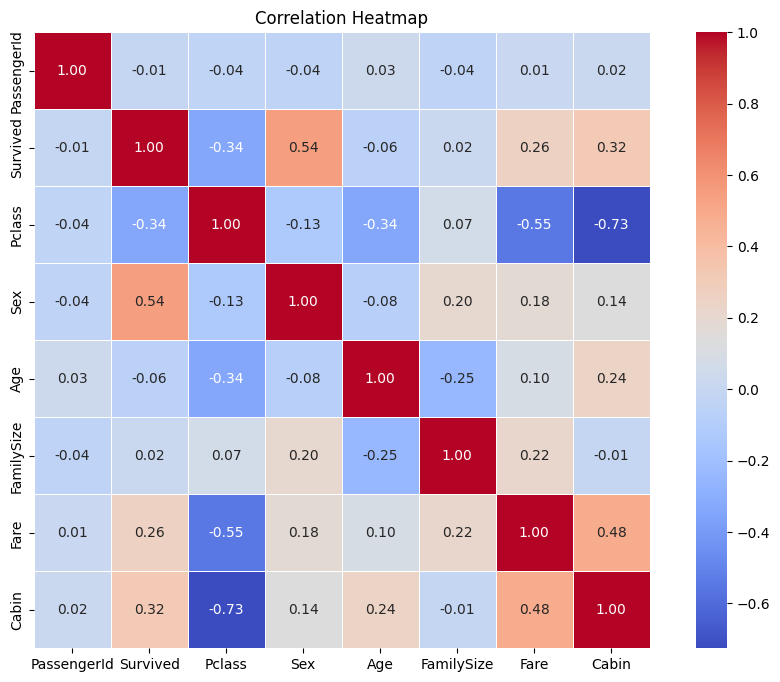

In [ ]:

correlation_matrix = train_numerical.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# linear regression, X & y train, summary of features

In [ ]:
# @title Fare's P>| Z | coefficient was 0.7(approximately) thats why i changed it with Age feature | added constant to training data
X_train=train[["Pclass","Sex","Age","Cabin"]]
Y_train=train["Survived"]
X_train=sm.add_constant(X_train)

In [ ]:
log_reg = sm.Logit(Y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.448775
         Iterations 6


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Fri, 09 Aug 2024   Pseudo R-squ.:                  0.3261
Time:                        14:35:10   Log-Likelihood:                -399.86
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.846e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4080      0.501      2.808      0.005       0.425       2.391
Pclass        -0.9250      0.156     -5.918      0.000      -1.231      -0.619
Sex            2.6035      0.187     13.938      0.0

# same transformations for Test Data

In [ ]:
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

In [ ]:
test_data=pd.merge(test,gender_submission,on="PassengerId")

In [ ]:
test_data["Cabin"].fillna(0,inplace=True)

In [ ]:
test_data["Age"].fillna(test_data["Age"].median(),inplace=True)

In [ ]:
test_data["Sex"] = test_data["Sex"].map({"male" : 0,"female" : 1})

In [ ]:
test_data['Cabin'] = test_data['Cabin'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
test_data['FamilySize'] = test_data['SibSp'] + train['Parch']

# X and y for testing, also adding the constant

In [ ]:
X_test_data = test_data[["Pclass","Sex","Age","Cabin"]]
X_test_data=sm.add_constant(X_test_data)
Y_test_data = test_data["Survived"]


In [ ]:
predictions = log_reg.predict(X_test_data)

In [ ]:
predictions = list(map(round, predictions))

# the results of the test

[[252  14]
 [  6 146]]
0.9521531100478469


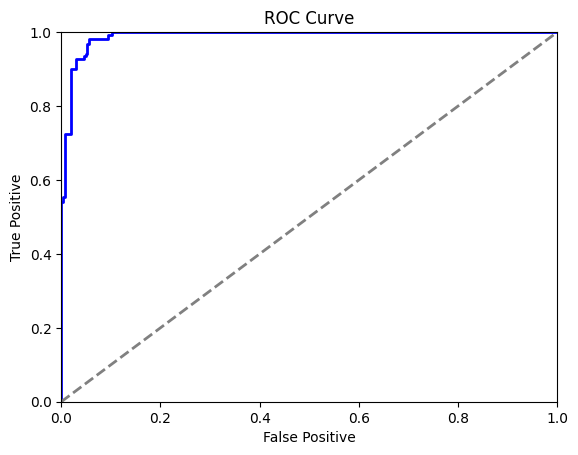

AUC: 0.99


In [ ]:
cm = confusion_matrix(Y_test_data, predictions)
accuracy= accuracy_score(Y_test_data,predictions)
print(cm)
print(accuracy)
y_pred_prob = log_reg.predict(X_test_data)

#ROC AUC curve
fpr, tpr, thresholds = roc_curve(Y_test_data, y_pred_prob)


plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(Y_test_data, y_pred_prob)))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()


auc = roc_auc_score(Y_test_data, y_pred_prob)
print(f'AUC: {auc:.2f}')